### CAPSTONE: PROJECT PROPOSAL
#### Eric Longomo, Bothell, WA, USA 
## Selecting the location for brand new Fashion Boutiques in high traffic areas in Seattle, Washington, USA.

## Contents
1. **Business Problem
    1.1. Business Understanding (Discussion of the Background)
    1.2. Analysis of Browns Fashion current location in Mayfair, London, UK
    1.3. Visualizing Browns Fashion store's surrounding in Mayfair, London, UK
    1.4 summary of the first section
2. Description of the Data acquisition and Wrangling
    2.1 Data collection
    2.2. Summary for section 2
3. Methodology and Exploratory Data Analysis
    3.1. Latitude and Longitude values of Seattle, WA using geopy Library
    3.2. Building map of Seattle with Neighbourhoods superimposed
    3.3. Exploratory Data Analysis
4. Results and Discussions
5. Conclusions

References 
    
## 1.0 Business Problem
The location of a fashion boutique is very important. This could potentially mean the difference between steady profits or a steady loss in revenue. A good understanding of the target market is key to finding the best retail location. Once the environment where the targeted audience shops, lives and works are determined, the best location that will attract these potential customers can then be selected. This makes it easy for customers to find the boutique by choosing a location that is close-by and convenient to stop in.

Established in 1970 as one of the first multi-brand boutiques in the UK, **Browns Fashion** –headquartered in Mayfair London, has a reputation as a fashion talent scout that is second to none. The company’s founder, Joan Burstein, employed Manolo Blahnik and Osman Yousefzada, and discovered Alexander McQueen and John Galliano –some of the top names in the fashion industry. Now owned by online giant Farfetch, the original South Molton Street store has powerful backing and a big digital engine, as well as a second store, **Browns East**. With a substantial e-commerce footprint, the company has begun the implentation of fashion boutique stores in major big cities as part of their omnichannel retail strategy. After rolling out stores in a few selected cities by guessing where the best locations to open, as part of their store expansion for Seattle, the company has decided to be more informed and selective, and take the time to do some research before opening a store in Seattle.

As a data scientist, I have been tasked to assist Browns in making data-driven decisions on the new locations –more suitable for the new stores in Seattle. This exploratory work constitutes a major part of their decision-making process. Then the company will internally conduct ground qualitative analyses of districts once the results of my analysis and report are reviewed.

### 1.1 Business Understanding (Discussion of the Background)
In general, most fashion boutiques are not necessarily located in the premium upmarket strips like, but rather, in high traffic areas where consumers go for shopping, restaurants and entertainment. Foursquare data are deemed very useful in making data-driven decisions about the best of those areas that will reproduce the similar success **Browns Fashion** has experienced in London. To achieve this, **Brown's** neighbourhood's latitude and longitude values in their London Boutique has been used to compile and analysis the 100 venues that are within a radius of 500 meters of their store in Mayfair, London, UK area. 

The analysis of Brown's current surounding of their London's stores (**see analysis in subsection 1.2**), shows that the best location to open new fashion retail store may not only be where other clothing stores are located, but in fact areas that are near all the following venues: 

1. **Art Gallery**  0.07
2. **Clothing Store**  0.05
3. **French Restaurant**  0.05
4. **Coffee Shop**  0.05
5. **Boutique**  0.04
6. **Juice Bar**  0.04
7. **Italian Restaurant**  0.04
8. **Hotel**  0.04
9. **Café**  0.03
10. **Cosmetics Shop**  0.03  

Thus, opening a new store where these above enumerated venues are located might attract folks that frequent these places often and bring similar success experienced in London.

The analysis and recommendations for a new store location in **Seattle** will focus on general districts with these establishments, not on specific store addresses. Narrowing down the best district options derived from analysis allows for either further research to be conducted, advising agents of the chosen district, or on the ground searching for specific sites by the company's personnel.

### 1.2 Analysis of Browns Fashion current location in Mayfair, London, UK

In this subsection, we explain with added code lines, how the presence of a number of venues that could be found in Brown Fashion in **MayfairLondon, UK** will guide our selection of the best location of the new store in Seattle -which will be the focus of the Data science workflow. 

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


The Foursquare API is then used to explore the Browns Fashion store's surrounding in London.

In [2]:
address = '24-27 S Molton St, Mayfair, London W1K 5RD, United Kingdom'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brown Fashion are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brown Fashion are 51.5134978, -0.1474765.


#### Defining credentials. 

In [3]:
CLIENT_ID = 'OR2A1F3IR522FBM4SN4F3S21WNFXZTFIUHT2LEA1YJYFMV55' # your Foursquare ID
CLIENT_SECRET = 'YCKMUFHEX4CQCURKEPBS4OJ5LKBRENO3HQKX41YA4ZGEFRE3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

Brown_latitude = latitude
Brown_longitude = longitude
neighborhood_name = 'Browns Fashion Store'


Now, let's get the top 100 venues that are in Mayfair (Browns Fashion current location in London) within a radius of 500 meters. First, let's create the GET request URL. Name your URL url.

In [4]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Brown_latitude, 
    Brown_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=OR2A1F3IR522FBM4SN4F3S21WNFXZTFIUHT2LEA1YJYFMV55&client_secret=YCKMUFHEX4CQCURKEPBS4OJ5LKBRENO3HQKX41YA4ZGEFRE3&v=20180605&ll=51.5134978,-0.1474765&radius=500&limit=100'

In [5]:
results = requests.get(url).json()
#results

In [6]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [7]:
latitudes = np.array([Brown_latitude])
longitudes = np.array([Brown_longitude])
neighborhood_name = ['Browns Fashion Store']

Venues_around_Browns = getNearbyVenues(names=neighborhood_name,
                                   latitudes=latitudes,
                                   longitudes=longitudes
                                  )

Browns Fashion Store


In [8]:
print(Venues_around_Browns.shape)
Venues_around_Browns.head()

(100, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Browns Fashion Store,51.513498,-0.147477,The Foyer & Reading Room,51.512577,-0.147663,Lounge
1,Browns Fashion Store,51.513498,-0.147477,La Petite Maison,51.512600,-0.146113,French Restaurant
2,Browns Fashion Store,51.513498,-0.147477,Claridge's,51.512656,-0.147813,Hotel
3,Browns Fashion Store,51.513498,-0.147477,JOE & THE JUICE,51.513831,-0.149524,Juice Bar
4,Browns Fashion Store,51.513498,-0.147477,Victoria's Secret,51.513170,-0.145313,Lingerie Store


In [9]:
Venues_around_Browns.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Browns Fashion Store,100,100,100,100,100,100


In [10]:
print('There are {} uniques categories.'.format(len(Venues_around_Browns['Venue Category'].unique())))

There are 51 uniques categories.


Let's analyze Brown Fashion Neighbourhood in London in details. 

In [11]:
# one hot encoding
Browns_onehot = pd.get_dummies(Venues_around_Browns[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Browns_onehot['Neighborhood'] = Venues_around_Browns['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Browns_onehot.columns[-1]] + list(Browns_onehot.columns[:-1])
Browns_onehot = Browns_onehot[fixed_columns]

Browns_onehot.head()

,Neighborhood,Art Gallery,Bakery,Boutique,Burger Joint,Café,Camera Store,Cantonese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Electronics Store,English Restaurant,Food Court,French Restaurant,Garden,Hotel,Hotel Bar,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Leather Goods Store,Lingerie Store,Lounge,Men's Store,Modern European Restaurant,Nightclub,Park,Pedestrian Plaza,Pharmacy,Pizza Place,Sandwich Place,Shoe Store,Social Club,Spa,Sporting Goods Shop,Sri Lankan Restaurant,Steakhouse,Supermarket,Tea Room,Thai Restaurant,Toy / Game Store,Turkish Restaurant,Wine Bar,Wine Shop
0,Browns Fashion Store,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Browns Fashion Store,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Browns Fashion Store,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Browns Fashion Store,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Browns Fashion Store,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
Browns_onehot.shape

(100, 52)

Next, let's group venues' rows and take the mean of the frequency of occurrence of each venue category

In [13]:
Browns_grouped = Browns_onehot.groupby('Neighborhood').mean().reset_index()
Browns_grouped

,Neighborhood,Art Gallery,Bakery,Boutique,Burger Joint,Café,Camera Store,Cantonese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Electronics Store,English Restaurant,Food Court,French Restaurant,Garden,Hotel,Hotel Bar,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Leather Goods Store,Lingerie Store,Lounge,Men's Store,Modern European Restaurant,Nightclub,Park,Pedestrian Plaza,Pharmacy,Pizza Place,Sandwich Place,Shoe Store,Social Club,Spa,Sporting Goods Shop,Sri Lankan Restaurant,Steakhouse,Supermarket,Tea Room,Thai Restaurant,Toy / Game Store,Turkish Restaurant,Wine Bar,Wine Shop
0,Browns Fashion Store,0.07,0.02,0.04,0.02,0.03,0.01,0.01,0.05,0.01,0.05,0.01,0.03,0.01,0.01,0.02,0.01,0.02,0.02,0.02,0.05,0.01,0.04,0.03,0.02,0.04,0.02,0.04,0.01,0.01,0.02,0.01,0.02,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.02,0.01,0.01,0.01,0.01,0.01


Let's confirm the new size

In [14]:
Browns_grouped.shape

(1, 52)

Let's print each neighborhood along with the top 10 most common venues

In [15]:
num_top_venues = 10

for hood in Browns_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Browns_grouped[Browns_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Browns Fashion Store----
                venue  freq
0         Art Gallery  0.07
1      Clothing Store  0.05
2   French Restaurant  0.05
3         Coffee Shop  0.05
4            Boutique  0.04
5           Juice Bar  0.04
6  Italian Restaurant  0.04
7               Hotel  0.04
8                Café  0.03
9      Cosmetics Shop  0.03




### 1.3 Visualizing Browns Fashion store's surrounding in Mayfair, London, UK 
In this section, we create map of Browns Fashoin surrounding area in London UK using latitude and longitude values in order to explore the area and replicate as much as possible the success experienced in seattle. 

In [16]:
map_Brown_Location = folium.Map(location=[latitude, longitude], zoom_start=20)

# add markers to map
lat, lng, label = latitude,longitude, address
label = folium.Popup(label, parse_html=True)
folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Brown_Location)  

# create map of New York using latitude and longitude values
#map_Brown_Location = folium.Map(location=[latitude, longitude], zoom_start=20)

# add markers to map
for lat, lng, venue in zip(Venues_around_Browns['Venue Latitude'], Venues_around_Browns['Venue Longitude'], Venues_around_Browns['Venue Category']):
    label = '{}, {}'.format('Mayfair', venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Brown_Location)  
    
map_Brown_Location

### 1.4 summary of the first section
In this section, we leverage Foursquare data of Brown Fashion store in london, to produce the 10 best venues surrounding their store in London. These top venues will help in the analysis in the next stage where we will use Seattle's data to determine the best locations possible for the new fashion boutiques. 

## 2. Description of the Data acquisition and Wrangling
In the absence of leveraging data to aid decisions about a new store location, Browns Fashion's decision makers could spend extensive amount of time and resources through dispatching a team to ask around seattle's districts/Neighborhood, consulting many real estate agents with their own district/Neighborhood biases, and end up opening in a location that is not ideal. Thus, leveraging data to explore different neighbourhoods around Seattle that might replicate similar success they experienced in Mayfair, London will provide unbias and better answers, and better solutions to potential new store locations. 

The aim is to identify the best neighbourhoods to open new stores as part of the company's plan. The results will be translated to management in a simple form that will convey the data-driven analysis for the best locations to open stores.

### 2.1. Data collection 
Seattle's Neighbourhoods and districts  data were scrapped from wikipidia[1, 2]. These data have been wrangled and cleaned. Geospacial data --latitude and longitude for each Neighbourhoud, were added for each Neighbourhood using Foursquare. The resulting Pandas DataFrame was also converted into a **.csv file** format suitable for analysis[4]. Based on the obtained dataset, the city of seattle and surroundings is subdivised into 90 Neighbourhoods --assembled in 19 neighbourhoods groups.

In [17]:
# 1. Download the .csv dataset and read it into a pandas dataframe.
# 2. Use Geopy to obtain the latitude and longitude of each Seattle borrow.
# 3. the final DataFrame will be placed in the GitHub repository (including the geo localisations)
# https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv

df = pd.read_csv('Seattle_neighbourhoods_Districts.csv')
df.head()

,District,Neighbourhood
0,Ballard,Adams
1,Ballard,Loyal Heights
2,Ballard,Sunset Hill
3,Ballard,West Woodland
4,Ballard,Whittier Heights


In [18]:
# define the dataframe columns
column_names = ['District', 'Neighbourhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
seattle_neighborhoods = pd.DataFrame(columns=column_names)
seattle_neighborhoods

,District,Neighbourhood,Latitude,Longitude


In [19]:
for index, row in df.iterrows():
    #latitude = None
    #longitude = None
    #address = row['Neighbourhood'] + ', '+ row['District']+ ', Seattle, Washington, USA'
    address = row['Neighbourhood'] + ', Seattle, WA'
    
    #loop until you get the coordinates
    #while (latitude is None or longitude is None):
    try:   
        geolocator = Nominatim(user_agent="Seattle_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of ' + address + ' are {}, {}.'.format(latitude, longitude))

        seattle_neighborhoods = seattle_neighborhoods.append({'District': row['District'],
                                          'Neighbourhood': row['Neighbourhood'],
                                          'Latitude': latitude,
                                          'Longitude': longitude}, ignore_index=True)
    except AttributeError:
        pass    
    

The geograpical coordinate of Adams, Seattle, WA are 47.565271, -122.2795457.
The geograpical coordinate of Loyal Heights, Seattle, WA are 47.6887088, -122.3929073.
The geograpical coordinate of Sunset Hill, Seattle, WA are 47.6752172, -122.3984484.
The geograpical coordinate of West Woodland, Seattle, WA are 47.6759733, -122.3474992.
The geograpical coordinate of Whittier Heights, Seattle, WA are 47.683297, -122.3714487.
The geograpical coordinate of Holly Park, Seattle, WA are 47.5416501, -122.291929.
The geograpical coordinate of North Beacon Hill, Seattle, WA are 47.5775857, -122.3099603.
The geograpical coordinate of South Beacon Hill, Seattle, WA are 47.5775857, -122.3099603.
The geograpical coordinate of Broadway, Seattle, WA are 47.606293, -122.3207937.
The geograpical coordinate of Madison Park, Seattle, WA are 47.6359301, -122.2801963.
The geograpical coordinate of Montlake, Seattle, WA are 47.6414082, -122.3030441.
The geograpical coordinate of Portage Bay, Seattle, WA are 4

In [20]:
seattle_neighborhoods

,District,Neighbourhood,Latitude,Longitude
0,Ballard,Adams,47.565271,-122.279546
1,Ballard,Loyal Heights,47.688709,-122.392907
2,Ballard,Sunset Hill,47.675217,-122.398448
3,Ballard,West Woodland,47.675973,-122.347499
4,Ballard,Whittier Heights,47.683297,-122.371449
5,Beacon Hill,Holly Park,47.541650,-122.291929
6,Beacon Hill,North Beacon Hill,47.577586,-122.309960
7,Beacon Hill,South Beacon Hill,47.577586,-122.309960
8,Capitol Hill,Broadway,47.606293,-122.320794
9,Capitol Hill,Madison Park,47.635930,-122.280196


In [21]:
seattle_neighborhoods.to_csv(r'C:\Users\Eric\Desktop\Data_Science_IBM\Capstone_Project\Final_assignment_capstone\Capstone_BattleOfNeighborhoods\Seatt_Neighbohoods_export.csv')

### 2.2. Summary for section 2

In this section, the list of Seattle Neighborhoods and Districts were researched and pulled from Wikepedia and converted into pandas DataFrame. Geospatial coordinates for each neighbourhoods were added using Foursquare.  In the Next section, Foursquare location data will be leveraged to explore or compare neighbourhoods in Seattle, identifying the high traffic areas where consumers go for shopping, dining and entertainment - the areas where the fashion brand are most interested in opening new stores, as illustrated in section 1.1.

## 3. Methodology and Exploratory Data Analysis

The principal theme throughout this section will be to use Foursquare location data to carry out the exploratory analysis and compare Neighbourhoods/Districts around Seattle, Wa. The step will encompasses:
1. data manipulation and analysis to derive subsets of the initial data
2. Identification of the high traffic areas using statistical analysis and data visualisation --using various mapping libraries including geospatial library in Python (folium) and Violinplot (seaborns)
3. Results and discussions

### 3.1. Latitude and Longitude values of Seattle, WA using geopy Library

In [22]:
from geopy.geocoders import Nominatim 

address = 'Seattle, Washington, USA'

# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Seattle_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Seattle WA are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Seattle WA are 47.6038321, -122.3300624.


### 3.2. Building map of Seattle with Neighbourhoods superimposed

In [23]:
# create map of seattle using the above obtained geo cordinates. 
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(seattle_neighborhoods['Latitude'], seattle_neighborhoods['Longitude'], seattle_neighborhoods['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= 5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

### 3.3. Exploratory Data Analysis
In this section, we will be exploring Seattle's neighborhoods using Foursquare API. 
Foursquare Credentials and Version have been defined in section 1. 

#### Defining the getNearbyVenues() function for all the neighborhoods in Seattle

Th **getNearbyVenues()** --defined below, allows us to retrieve n number of venues within a predefined radius from the geo coordinate of any given neighborhood. 

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


#### Creating a new DataFrame (**seattle_venues**) that contains all the venues in all considered seattle neighbourhoods

In [26]:
seattle_venues = getNearbyVenues(names=seattle_neighborhoods['Neighbourhood'],
                                   latitudes=seattle_neighborhoods['Latitude'],
                                   longitudes=seattle_neighborhoods['Longitude']
                                  )

Adams
Loyal Heights
Sunset Hill
West Woodland
Whittier Heights
Holly Park
North Beacon Hill
South Beacon Hill
Broadway
Madison Park
Montlake
Portage Bay
Stevens
Eastlake
South Lake Union
Westlake
Atlantic
Harrison/Denny-Blaine
Leschi
Madrona
Mann
Minor
Highland Park
High Point
North Delridge
Riverview
Roxhill
South Delridge
Belltown
Central Business District
First Hill
International District
Pike-Market
Pioneer Square
Yesler Terrace
Interbay
Cedar Park
Matthews Beach
Meadowbrook
Olympic Hills
Victory Heights
Briarcliff
Lawton Park
Southeast Magnolia
Haller Lake
Maple Leaf
North College Park
Pinehurst
Bitter Lake
Broadview
Bryant
Crown Hill
Fremont
Georgetown
Green Lake
Greenwood
Harbor Island
Laurelhurst
Phinney Ridge
Ravenna
Roosevelt
Sand Point
South Park
View Ridge
Wallingford
Wedgwood
Windermere
East Queen Anne
Lower Queen Anne
North Queen Anne
West Queen Anne
Brighton
Columbia City
Dunlap
Mount Baker
Rainier Beach
Rainier View
Seward Park
University District
Alki
Arbor Heights
Fai

In [27]:
print(seattle_venues.shape)
seattle_venues.head(100)

(2438, 7)


,Neighbourhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adams,47.565271,-122.279546,Genesee Park & Playground,47.564485,-122.279274,Park
1,Adams,47.565271,-122.279546,Genesee Dog Park,47.563495,-122.276687,Dog Run
2,Adams,47.565271,-122.279546,Genesee Park - Soccer Fields,47.562986,-122.278359,Soccer Field
3,Adams,47.565271,-122.279546,Dean's Kitchen,47.563668,-122.283781,American Restaurant
4,Loyal Heights,47.688709,-122.392907,Cafe Munir,47.686908,-122.387996,Middle Eastern Restaurant
5,Loyal Heights,47.688709,-122.392907,Larsen's Bakery,47.686804,-122.387524,Bakery
6,Loyal Heights,47.688709,-122.392907,Fresh Fish Company,47.686888,-122.387236,Fish Market
7,Loyal Heights,47.688709,-122.392907,Saleh's Delicatessen,47.686702,-122.387918,Convenience Store
8,Loyal Heights,47.688709,-122.392907,Cocina Esperanza,47.690447,-122.397992,Mexican Restaurant
9,Loyal Heights,47.688709,-122.392907,Soprano's Pizza & Pasta,47.685948,-122.387791,Pizza Place


#### Computing the number of venues returned for each neighborhood¶
Here, we will be printing only a maximum of 100 venues per neighbouhood as there is a 100 venue limit imposed by the free SandboxFoursquare account.

In [28]:
seattle_venues.groupby('Neighbourhood').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Adams,4,4,4,4,4,4
Alki,44,44,44,44,44,44
Atlantic,11,11,11,11,11,11
Belltown,100,100,100,100,100,100
Bitter Lake,28,28,28,28,28,28
Briarcliff,4,4,4,4,4,4
Brighton,4,4,4,4,4,4
Broadview,9,9,9,9,9,9
Broadway,59,59,59,59,59,59


### Computing the number of unique venue categories existing in each neighbourhood

Here, we Compute how many unique categories there are in each neighbourhood in Seattle.

In [29]:
print('There are {} uniques categories.'.format(len(seattle_venues['Venue Category'].unique())))

There are 295 uniques categories.


### Analysis of each of the neighbourhoods in seattle from the results 

In [30]:
# one hot encoding
seattle_onehot = pd.get_dummies(seattle_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
seattle_onehot['Neighbourhood'] = seattle_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [seattle_onehot.columns[-1]] + list(seattle_onehot.columns[:-1])
seattle_onehot = seattle_onehot[fixed_columns]

seattle_onehot.head()

,Neighbourhood,ATM,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Bath House,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Boat Rental,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Bowling Green,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Science Building,College Theater,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Credit Union,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Laundry Service,Lawyer,Library,Light Rail Station,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Peking Duck Restaurant,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Post Office,Pub,Public Art,Radio Station,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Club,Rugby Pitch,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Toy / Game Store,Track,Trail,Tram Station,Turkish Restaurant,Udon Restaurant,Vacation Rental,Vegetarian / Vegan Restaurant,Video Gam

And let's examine the new dataframe size.

In [31]:
seattle_onehot.shape

(2438, 296)

### Group rows by neighborhood and take the mean of the frequency of occurrence of each category

In [32]:
seattle_grouped = seattle_onehot.groupby('Neighbourhood').mean().reset_index()
seattle_grouped

,Neighbourhood,ATM,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Bath House,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Boat Rental,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Bowling Green,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Science Building,College Theater,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Credit Union,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Laundry Service,Lawyer,Library,Light Rail Station,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Peking Duck Restaurant,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Post Office,Pub,Public Art,Radio Station,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Club,Rugby Pitch,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Toy / Game Store,Track,Trail,Tram Station,Turkish Restaurant,Udon Restaurant,Vacation Rental,Vegetarian / Vegan Restaurant,Video Gam

Let's confirm the new size

In [33]:
seattle_grouped.shape

(84, 296)

### Print each neighborhood with it's top 10 most common venues

In [34]:
num_top_venues = 10

for hood in seattle_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = seattle_grouped[seattle_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adams----
                           venue  freq
0                           Park  0.25
1            American Restaurant  0.25
2                   Soccer Field  0.25
3                        Dog Run  0.25
4                            ATM  0.00
5                Other Nightlife  0.00
6  Paper / Office Supplies Store  0.00
7           Outdoor Supply Store  0.00
8              Outdoor Sculpture  0.00
9              Other Repair Shop  0.00


----Alki----
                venue  freq
0      Ice Cream Shop  0.09
1         Coffee Shop  0.07
2  Mexican Restaurant  0.07
3  Italian Restaurant  0.05
4     Thai Restaurant  0.05
5          Restaurant  0.05
6                Park  0.05
7           Beach Bar  0.02
8  Seafood Restaurant  0.02
9              Market  0.02


----Atlantic----
                    venue  freq
0      Light Rail Station  0.18
1  Thrift / Vintage Store  0.09
2             Cheese Shop  0.09
3    Marijuana Dispensary  0.09
4           Grocery Store  0.09
5       Electronics Sto

          venue  freq
0          Park  0.38
1          Lake  0.12
2         Beach  0.12
3       Theater  0.12
4  Tennis Court  0.12
5         Trail  0.12
6  Noodle House  0.00
7        Office  0.00
8   Opera House  0.00
9  Optical Shop  0.00


----Greenwood----
                       venue  freq
0                Coffee Shop  0.11
1                        Spa  0.07
2                        Bar  0.07
3         Mexican Restaurant  0.07
4                Pizza Place  0.04
5                  Bookstore  0.04
6  Middle Eastern Restaurant  0.02
7           Toy / Game Store  0.02
8                  Pet Store  0.02
9   Mediterranean Restaurant  0.02


----Haller Lake----
          venue  freq
0          Lake   0.2
1   Coffee Shop   0.2
2          Park   0.2
3    Playground   0.2
4  Dance Studio   0.2
5     Nightclub   0.0
6  Noodle House   0.0
7        Office   0.0
8   Opera House   0.0
9  Optical Shop   0.0


----Harrison/Denny-Blaine----
                           venue  freq
0                 

                   venue  freq
0            Gas Station  0.29
1                  Trail  0.14
2            Pet Service  0.14
3            Pizza Place  0.14
4                   Park  0.14
5  Vietnamese Restaurant  0.14
6           Optical Shop  0.00
7   Outdoor Supply Store  0.00
8      Outdoor Sculpture  0.00
9      Other Repair Shop  0.00


----North Queen Anne----
                venue  freq
0  Mexican Restaurant  0.04
1       Grocery Store  0.04
2         Coffee Shop  0.04
3            Bus Stop  0.04
4              Bakery  0.04
5     Thai Restaurant  0.04
6         Pizza Place  0.04
7          Restaurant  0.04
8      Cosmetics Shop  0.04
9         Yoga Studio  0.04


----Olympic Hills----
                           venue  freq
0                     Food Truck  0.25
1                      Pool Hall  0.25
2                 Farmers Market  0.25
3      Middle Eastern Restaurant  0.25
4                Organic Grocery  0.00
5  Paper / Office Supplies Store  0.00
6           Outdoor Supply 

9                            ATM  0.00


----Wallingford----
                 venue  freq
0  Japanese Restaurant  0.07
1          Coffee Shop  0.06
2      Thai Restaurant  0.04
3             Pharmacy  0.04
4     Asian Restaurant  0.04
5            Gift Shop  0.03
6            Bookstore  0.03
7                  Pub  0.03
8           Taco Place  0.03
9                 Bank  0.03


----Wedgwood----
         venue  freq
0  Coffee Shop  0.15
1         Park  0.15
2          ATM  0.08
3  Video Store  0.08
4          Pub  0.08
5     Pharmacy  0.08
6   Steakhouse  0.08
7          Gym  0.08
8         Bank  0.08
9  Supermarket  0.08


----West Queen Anne----
                venue  freq
0  Mexican Restaurant  0.04
1       Grocery Store  0.04
2         Coffee Shop  0.04
3            Bus Stop  0.04
4              Bakery  0.04
5     Thai Restaurant  0.04
6         Pizza Place  0.04
7          Restaurant  0.04
8      Cosmetics Shop  0.04
9         Yoga Studio  0.04


----West Woodland----
            

### Let's put the above data into a pandas dataframe
First, let's write the function **return_most_common_venues()** that sorts the venues in descending order.

In [51]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Displaying the top 10 venue categories for each Seattle's neighborhood
The results displayed here are very important as they give snip of the information for all of the neighbourhoods. We will frequently refer to these results further down the line for meaningful insights about the top categories of business in all neighbourhood and draw the conclusion if the neighbourhood is similar to Browns Fashion neighbourhood in **Mayfair, London UK**. Even without actual counts and numbers, it makes a great reference table for Browns Fashion's decision makers.

In [67]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = seattle_grouped['Neighbourhood']

for ind in np.arange(seattle_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seattle_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(15)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adams,Park,American Restaurant,Soccer Field,Dog Run,Farmers Market,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant
1,Alki,Ice Cream Shop,Mexican Restaurant,Coffee Shop,Park,Thai Restaurant,Restaurant,Italian Restaurant,Pharmacy,Sports Bar,Seafood Restaurant
2,Atlantic,Light Rail Station,Thrift / Vintage Store,Marijuana Dispensary,Electronics Store,Food Truck,Sporting Goods Shop,Rental Car Location,Cheese Shop,Intersection,Grocery Store
3,Belltown,Bar,New American Restaurant,Cocktail Bar,Bakery,Sushi Restaurant,Hotel,Coffee Shop,Seafood Restaurant,Breakfast Spot,Italian Restaurant
4,Bitter Lake,Fast Food Restaurant,Grocery Store,Gym / Fitness Center,ATM,Sandwich Place,Coffee Shop,Donut Shop,Mobile Phone Shop,Thai Restaurant,Chinese Restaurant
5,Briarcliff,Park,Trail,Bus Stop,Athletics & Sports,Electronics Store,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant
6,Brighton,Salon / Barbershop,Convenience Store,Café,Greek Restaurant,Fast Food Restaurant,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market
7,Broadview,Convenience Store,Pizza Place,Thai Restaurant,Beer Bar,Sushi Restaurant,Furniture / Home Store,Video Store,Antique Shop,Food Truck,Floating Market
8,Broadway,Coffee Shop,Sandwich Place,Korean Restaurant,Bar,Bus Stop,Café,Asian Restaurant,Ethiopian Restaurant,Pharmacy,Poke Place
9,Bryant,Park,Organic Grocery,Zoo Exhibit,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant


### The shape of the sorted data is:

In [68]:
neighborhoods_venues_sorted.shape

(84, 11)

### 3.5. Cluster Neighborhoods¶
In this step, we run **k-means** to cluster the neighborhoods into 7 different clusters. This is aimed at grouping similar clusters of neighbouhoods together then selecting which among the group of clusters represents the criteria best. Then a thorough analysi of that cluster will be done to select the best neighbourhood for the new Browns Fashion Boutiques.

In [75]:
# set number of clusters
kclusters = 7

seattle_grouped_clustering = seattle_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(seattle_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 5, 5, 5, 5, 2, 4, 5, 5, 2])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [76]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

seattle_merged = seattle_neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
seattle_merged = seattle_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

# check the last columns!
seattle_merged.head()

,District,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ballard,Adams,47.565271,-122.279546,2.0,Park,American Restaurant,Soccer Field,Dog Run,Farmers Market,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant
1,Ballard,Loyal Heights,47.688709,-122.392907,5.0,Middle Eastern Restaurant,Convenience Store,Mexican Restaurant,Bakery,Pizza Place,General College & University,Fish Market,Coffee Shop,Zoo Exhibit,Fast Food Restaurant
2,Ballard,Sunset Hill,47.675217,-122.398448,5.0,Bakery,Ice Cream Shop,Weight Loss Center,Cocktail Bar,Italian Restaurant,Zoo Exhibit,Fast Food Restaurant,Eye Doctor,Fabric Shop,Fair
3,Ballard,West Woodland,47.675973,-122.347499,2.0,Park,Zoo Exhibit,Asian Restaurant,Lake,Trail,Caribbean Restaurant,Bowling Green,Fish & Chips Shop,Fabric Shop,Fair
4,Ballard,Whittier Heights,47.683297,-122.371449,5.0,Mexican Restaurant,Greek Restaurant,Breakfast Spot,Bus Stop,Furniture / Home Store,Caribbean Restaurant,Karaoke Bar,Bakery,Cocktail Bar,Trail


### Visualization of the resulting clusters

In [77]:
seattle_merged = seattle_merged[seattle_merged['Cluster Labels'].notna()]

In [78]:
cluster_labels = seattle_merged['Cluster Labels'].astype(int)

In [79]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
cluster_labels = seattle_merged['Cluster Labels'].astype(int)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(seattle_merged['Latitude'], seattle_merged['Longitude'], seattle_merged['Neighbourhood'], cluster_labels):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

###  5. Examine Clusters
The respective clusters can be examined so that a determination of the discriminating venue categories that distinguish each cluster can be established. 

#### Cluster 1

In [138]:
Cluster_1 = seattle_merged.loc[seattle_merged['Cluster Labels'] == 0, seattle_merged.columns[[1] + list(range(5, seattle_merged.shape[1]))]]
Cluster_1

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,North Delridge,Gas Station,Park,Pizza Place,Trail,Pet Service,Vietnamese Restaurant,Field,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
27,South Delridge,Gas Station,Park,Pizza Place,Trail,Pet Service,Vietnamese Restaurant,Field,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


#### Cluster 2

In [139]:
Cluster_2 = seattle_merged.loc[seattle_merged['Cluster Labels'] == 1, seattle_merged.columns[[1] + list(range(0, seattle_merged.shape[1]))]]
Cluster_2

,Neighbourhood,District,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Holly Park,Beacon Hill,Holly Park,47.541650,-122.291929,1.0,Brewery,Art Gallery,Playground,Zoo Exhibit,Field,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market
10,Montlake,Capitol Hill,Montlake,47.641408,-122.303044,1.0,Bus Stop,Coffee Shop,Grocery Store,Italian Restaurant,Park,Library,American Restaurant,Salon / Barbershop,Bike Shop,Zoo Exhibit
11,Portage Bay,Capitol Hill,Portage Bay,47.647484,-122.319286,1.0,Bus Stop,Café,Mexican Restaurant,Deli / Bodega,American Restaurant,Playground,Pizza Place,Art Gallery,Flower Shop,Eastern European Restaurant
22,Highland Park,Delridge,Highland Park,47.528432,-122.352626,1.0,Bar,Playground,Gym,Baseball Field,Bus Stop,Fast Food Restaurant,Event Space,Eye Doctor,Fabric Shop,Fair
38,Meadowbrook,Lake City,Meadowbrook,47.705616,-122.288158,1.0,Playground,Soccer Field,Restaurant,Pizza Place,Auto Garage,Zoo Exhibit,Falafel Restaurant,Ethiopian Restaurant,Event Space,Eye Doctor
39,Olympic Hills,Lake City,Olympic Hills,47.729900,-122.299100,1.0,Food Truck,Pool Hall,Middle Eastern Restaurant,Farmers Market,Zoo Exhibit,Field,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant
40,Victory Heights,Lake City,Victory Heights,47.707598,-122.307627,1.0,Garden,Marijuana Dispensary,Playground,Field,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant
42,Lawton Park,Magnolia,Lawton Park,47.656329,-122.400296,1.0,Coffee Shop,Park,Breakfast Spot,Chiropractor,Playground,Grocery Store,Gas Station,Laundry Service,Zoo Exhibit,Eye Doctor
43,Southeast Magnolia,Magnolia,Southeast Magnolia,47.646811,-122.399489,1.0,Video Store,Pool,Chinese Restaurant,Bus Stop,Zoo Exhibit,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market
44,Haller Lake,Northgate,Haller Lake,47.719748,-122.333751,1.0,Park,Dance Studio,Coffee Shop,Playground,Lake,Flower Shop,Floating Market,Food,Fish Market,Fish & Chips Shop


#### Cluster 3

In [140]:
Cluster_3 = seattle_merged.loc[seattle_merged['Cluster Labels'] == 2, seattle_merged.columns[[1] + list(range(5, seattle_merged.shape[1]))]]
Cluster_3

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adams,Park,American Restaurant,Soccer Field,Dog Run,Farmers Market,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant
3,West Woodland,Park,Zoo Exhibit,Asian Restaurant,Lake,Trail,Caribbean Restaurant,Bowling Green,Fish & Chips Shop,Fabric Shop,Fair
18,Leschi,Park,Pet Store,Playground,Pizza Place,Bus Stop,Grocery Store,Fair,Ethiopian Restaurant,Event Space,Eye Doctor
23,High Point,Field,Bus Station,Park,Brewery,Spa,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market
25,Riverview,Bus Station,Other Repair Shop,Trail,Park,Baseball Field,Floating Market,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant
36,Cedar Park,Vietnamese Restaurant,Park,Zoo Exhibit,Ethiopian Restaurant,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market
37,Matthews Beach,Park,Trail,Playground,Vacation Rental,Falafel Restaurant,Ethiopian Restaurant,Event Space,Eye Doctor,Fabric Shop,Fair
41,Briarcliff,Park,Trail,Bus Stop,Athletics & Sports,Electronics Store,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant
50,Bryant,Park,Organic Grocery,Zoo Exhibit,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant
54,Green Lake,Park,Lake,Trail,Theater,Beach,Tennis Court,Zoo Exhibit,Falafel Restaurant,Fabric Shop,Fair


### Cluster 4

In [141]:
Cluster_4 = seattle_merged.loc[seattle_merged['Cluster Labels'] == 3, seattle_merged.columns[[1] + list(range(5, seattle_merged.shape[1]))]]
Cluster_4

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
77,Seward Park,Beach,Zoo Exhibit,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field


### Cluster 5

In [154]:
Cluster_5 = seattle_merged.loc[seattle_merged['Cluster Labels'] == 4, seattle_merged.columns[[1] + list(range(5, seattle_merged.shape[1]))]]
Cluster_5

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
71,Brighton,Salon / Barbershop,Convenience Store,Café,Greek Restaurant,Fast Food Restaurant,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market


### cluster 6

In [155]:
Cluster_6 = seattle_merged.loc[seattle_merged['Cluster Labels'] == 5, seattle_merged.columns[[1] + list(range(0, seattle_merged.shape[1]))]]
Cluster_6

,Neighbourhood,District,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Loyal Heights,Ballard,Loyal Heights,47.688709,-122.392907,5.0,Middle Eastern Restaurant,Convenience Store,Mexican Restaurant,Bakery,Pizza Place,General College & University,Fish Market,Coffee Shop,Zoo Exhibit,Fast Food Restaurant
2,Sunset Hill,Ballard,Sunset Hill,47.675217,-122.398448,5.0,Bakery,Ice Cream Shop,Weight Loss Center,Cocktail Bar,Italian Restaurant,Zoo Exhibit,Fast Food Restaurant,Eye Doctor,Fabric Shop,Fair
4,Whittier Heights,Ballard,Whittier Heights,47.683297,-122.371449,5.0,Mexican Restaurant,Greek Restaurant,Breakfast Spot,Bus Stop,Furniture / Home Store,Caribbean Restaurant,Karaoke Bar,Bakery,Cocktail Bar,Trail
6,North Beacon Hill,Beacon Hill,North Beacon Hill,47.577586,-122.309960,5.0,Mexican Restaurant,Pub,Food Truck,Bus Station,Café,Coffee Shop,Peking Duck Restaurant,Mediterranean Restaurant,Light Rail Station,Taco Place
7,South Beacon Hill,Beacon Hill,South Beacon Hill,47.577586,-122.309960,5.0,Mexican Restaurant,Pub,Food Truck,Bus Station,Café,Coffee Shop,Peking Duck Restaurant,Mediterranean Restaurant,Light Rail Station,Taco Place
8,Broadway,Capitol Hill,Broadway,47.606293,-122.320794,5.0,Coffee Shop,Sandwich Place,Korean Restaurant,Bar,Bus Stop,Café,Asian Restaurant,Ethiopian Restaurant,Pharmacy,Poke Place
9,Madison Park,Capitol Hill,Madison Park,47.635930,-122.280196,5.0,Bar,Bank,Park,Pizza Place,Bath House,Beach,Jewelry Store,Tennis Court,Kitchen Supply Store,Korean Restaurant
12,Stevens,Capitol Hill,Stevens,47.654349,-122.315996,5.0,Vietnamese Restaurant,Park,Coffee Shop,Harbor / Marina,Korean Restaurant,Sandwich Place,Pizza Place,Bank,Burger Joint,Thai Restaurant
13,Eastlake,Cascade,Eastlake,47.643145,-122.326172,5.0,Sandwich Place,Coffee Shop,Playground,Mexican Restaurant,Steakhouse,Korean Restaurant,Furniture / Home Store,General Travel,Bar,Trail
14,South Lake Union,Cascade,South Lake Union,47.623161,-122.338382,5.0,Coffee Shop,Food Truck,Mexican Restaurant,Gym / Fitness Center,American Restaurant,Café,Hotel,Camera Store,Bus Stop,Italian Restaurant


### Cluster 7

In [156]:
Cluster_7 = seattle_merged.loc[seattle_merged['Cluster Labels'] == 6, seattle_merged.columns[[1] + list(range(5, seattle_merged.shape[1]))]]
Cluster_7

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Harrison/Denny-Blaine,Park,Zoo Exhibit,Event Space,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field
63,View Ridge,Park,Bus Stop,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field


### Meeting Browns Fashion's selection criteria for new location. 
Based on the results from different clusters, It appears that cluster 6 seems to be closely related to Browns neighborhood in Mayfair London. The choice of cluster 6 was made as it's include all the type of businesses that were specified in section 1 after a pre-analysis of the surrounding of the location of their successfull operation in Mayfaire, London UK. Recall, Brown Fashion has experienced tremendous success in London and the would like to replicate the experience in their new location. After an initial exploratory analysis of their bootique in Mayfair, London, the following top businesses in that area were identified: 
1. **Art Gallery**   
2. **Clothing Store**   
3. **French Restaurant**   
4. **Coffee Shop**   
5. **Boutique**   
6. **Juice Bar**   
7. **Italian Restaurant**   
8. **Hotel**   
9. **Café**   
10. **Cosmetics Shop**   

Next, we leverage data to look at the frequency of occurance of the above businesses for all **Cluster 6's neighborhoods**, isolating the categorical venues. Recall, in orther to replicate the success in London as much as possible, the avobe venue types needs to be in abundance density of any ideal store locations. In order to reduce the complexity in this task and for better vizualisation, only 3 top business types choosen will be explored out of the 10 enumerated above. These are:
1. **Art Gallery**     
2. **French Restaurant**   
3. **Coffee Shop**

We will also limit the analysis to only the **Central area distric**  and **Downtown seattle** for Cluster 6. 


### Shape and size of **Cluster 6**

In [157]:
print('The shape of cluster 6 is: ', Cluster_6.shape)
print('The size of cluster 6 is: ', Cluster_6.size)
#Cluster_6 =Cluster_6.drop([Cluster_6.columns[0] ],  axis='columns')
Cluster_6

The shape of cluster 6 is:  (49, 16)
The size of cluster 6 is:  784


,Neighbourhood,District,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Loyal Heights,Ballard,Loyal Heights,47.688709,-122.392907,5.0,Middle Eastern Restaurant,Convenience Store,Mexican Restaurant,Bakery,Pizza Place,General College & University,Fish Market,Coffee Shop,Zoo Exhibit,Fast Food Restaurant
2,Sunset Hill,Ballard,Sunset Hill,47.675217,-122.398448,5.0,Bakery,Ice Cream Shop,Weight Loss Center,Cocktail Bar,Italian Restaurant,Zoo Exhibit,Fast Food Restaurant,Eye Doctor,Fabric Shop,Fair
4,Whittier Heights,Ballard,Whittier Heights,47.683297,-122.371449,5.0,Mexican Restaurant,Greek Restaurant,Breakfast Spot,Bus Stop,Furniture / Home Store,Caribbean Restaurant,Karaoke Bar,Bakery,Cocktail Bar,Trail
6,North Beacon Hill,Beacon Hill,North Beacon Hill,47.577586,-122.309960,5.0,Mexican Restaurant,Pub,Food Truck,Bus Station,Café,Coffee Shop,Peking Duck Restaurant,Mediterranean Restaurant,Light Rail Station,Taco Place
7,South Beacon Hill,Beacon Hill,South Beacon Hill,47.577586,-122.309960,5.0,Mexican Restaurant,Pub,Food Truck,Bus Station,Café,Coffee Shop,Peking Duck Restaurant,Mediterranean Restaurant,Light Rail Station,Taco Place
8,Broadway,Capitol Hill,Broadway,47.606293,-122.320794,5.0,Coffee Shop,Sandwich Place,Korean Restaurant,Bar,Bus Stop,Café,Asian Restaurant,Ethiopian Restaurant,Pharmacy,Poke Place
9,Madison Park,Capitol Hill,Madison Park,47.635930,-122.280196,5.0,Bar,Bank,Park,Pizza Place,Bath House,Beach,Jewelry Store,Tennis Court,Kitchen Supply Store,Korean Restaurant
12,Stevens,Capitol Hill,Stevens,47.654349,-122.315996,5.0,Vietnamese Restaurant,Park,Coffee Shop,Harbor / Marina,Korean Restaurant,Sandwich Place,Pizza Place,Bank,Burger Joint,Thai Restaurant
13,Eastlake,Cascade,Eastlake,47.643145,-122.326172,5.0,Sandwich Place,Coffee Shop,Playground,Mexican Restaurant,Steakhouse,Korean Restaurant,Furniture / Home Store,General Travel,Bar,Trail
14,South Lake Union,Cascade,South Lake Union,47.623161,-122.338382,5.0,Coffee Shop,Food Truck,Mexican Restaurant,Gym / Fitness Center,American Restaurant,Café,Hotel,Camera Store,Bus Stop,Italian Restaurant


### On top of choosing clusters let also make sure that the remaing data does contain only downtown seattle and the central district areas


In [161]:
Cluster_6a = Cluster_6[Cluster_6.District == 'Central Area']
Cluster_6b = Cluster_6[Cluster_6.District == 'Downtown'] 

Cluster_6a_b = Cluster_6a.append(Cluster_6b)

Cluster_6New = Cluster_6a_b[['Neighbourhood', 'District', 'Latitude', 'Longitude']].copy()
Cluster_6New = Cluster_6New.loc[:,~Cluster_6New.columns.duplicated()]
Cluster_6New

,Neighbourhood,District,Latitude,Longitude
16,Atlantic,Central Area,47.590493,-122.324313
19,Madrona,Central Area,47.612792,-122.291226
20,Mann,Central Area,47.608832,-122.337419
21,Minor,Central Area,47.626594,-122.332267
28,Belltown,Downtown,47.613231,-122.345361
29,Central Business District,Downtown,47.609532,-122.336290
30,First Hill,Downtown,47.609305,-122.324984
31,International District,Downtown,47.598496,-122.328000
32,Pike-Market,Downtown,47.614463,-122.334089
33,Pioneer Square,Downtown,47.602139,-122.333927


In [ ]:
Analysis of each of the neighbourhoods in cluster 6 from the results

In [166]:
Cluster_6New_venues = getNearbyVenues(names=Cluster_6New['Neighbourhood'],
                                   latitudes=Cluster_6New['Latitude'],
                                   longitudes=Cluster_6New['Longitude']
                                  )

Atlantic
Madrona
Mann
Minor
Belltown
Central Business District
First Hill
International District
Pike-Market
Pioneer Square
Yesler Terrace


In [167]:
print(Cluster_6New_venues.shape)
Cluster_6New_venues.head()

(768, 7)


,Neighbourhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Atlantic,47.590493,-122.324313,RE-PC,47.588489,-122.326324,Electronics Store
1,Atlantic,47.590493,-122.324313,Big John's PFI,47.594397,-122.327075,Cheese Shop
2,Atlantic,47.590493,-122.324313,Dockside Cannabis Sodo,47.587318,-122.328653,Marijuana Dispensary
3,Atlantic,47.590493,-122.324313,El Camión,47.594576,-122.325144,Food Truck
4,Atlantic,47.590493,-122.324313,Outdoor Emporium,47.587867,-122.329409,Sporting Goods Shop


In [168]:
Cluster_6New_venues.groupby('Neighbourhood').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Atlantic,11,11,11,11,11,11
Belltown,100,100,100,100,100,100
Central Business District,100,100,100,100,100,100
First Hill,46,46,46,46,46,46
International District,100,100,100,100,100,100
Madrona,31,31,31,31,31,31
Mann,100,100,100,100,100,100
Minor,52,52,52,52,52,52
Pike-Market,100,100,100,100,100,100


In [169]:
print('There are {} uniques categories.'.format(len(Cluster_6New_venues['Venue Category'].unique())))

There are 170 uniques categories.


In [171]:
# one hot encoding
Cluster_6New_onehot = pd.get_dummies(Cluster_6New_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Cluster_6New_onehot['Neighbourhood'] = Cluster_6New_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [Cluster_6New_onehot.columns[-1]] + list(Cluster_6New_onehot.columns[:-1])
Cluster_6New_onehot = Cluster_6New_onehot[fixed_columns]

Cluster_6New_onehot.head()

,Neighbourhood,ATM,Accessories Store,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beer Bar,Bike Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Bus Stop,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fish Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Government Building,Grocery Store,Gym,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Light Rail Station,Lounge,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Other Nightlife,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool Hall,Pub,Record Shop,Rental Car Location,Restaurant,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Snack Place,Social Club,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tour Provider,Toy / Game Store,Trail,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Atlantic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Atlantic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Atlantic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Atlantic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Atlantic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [172]:
Cluster_6New_onehot.shape

(768, 171)

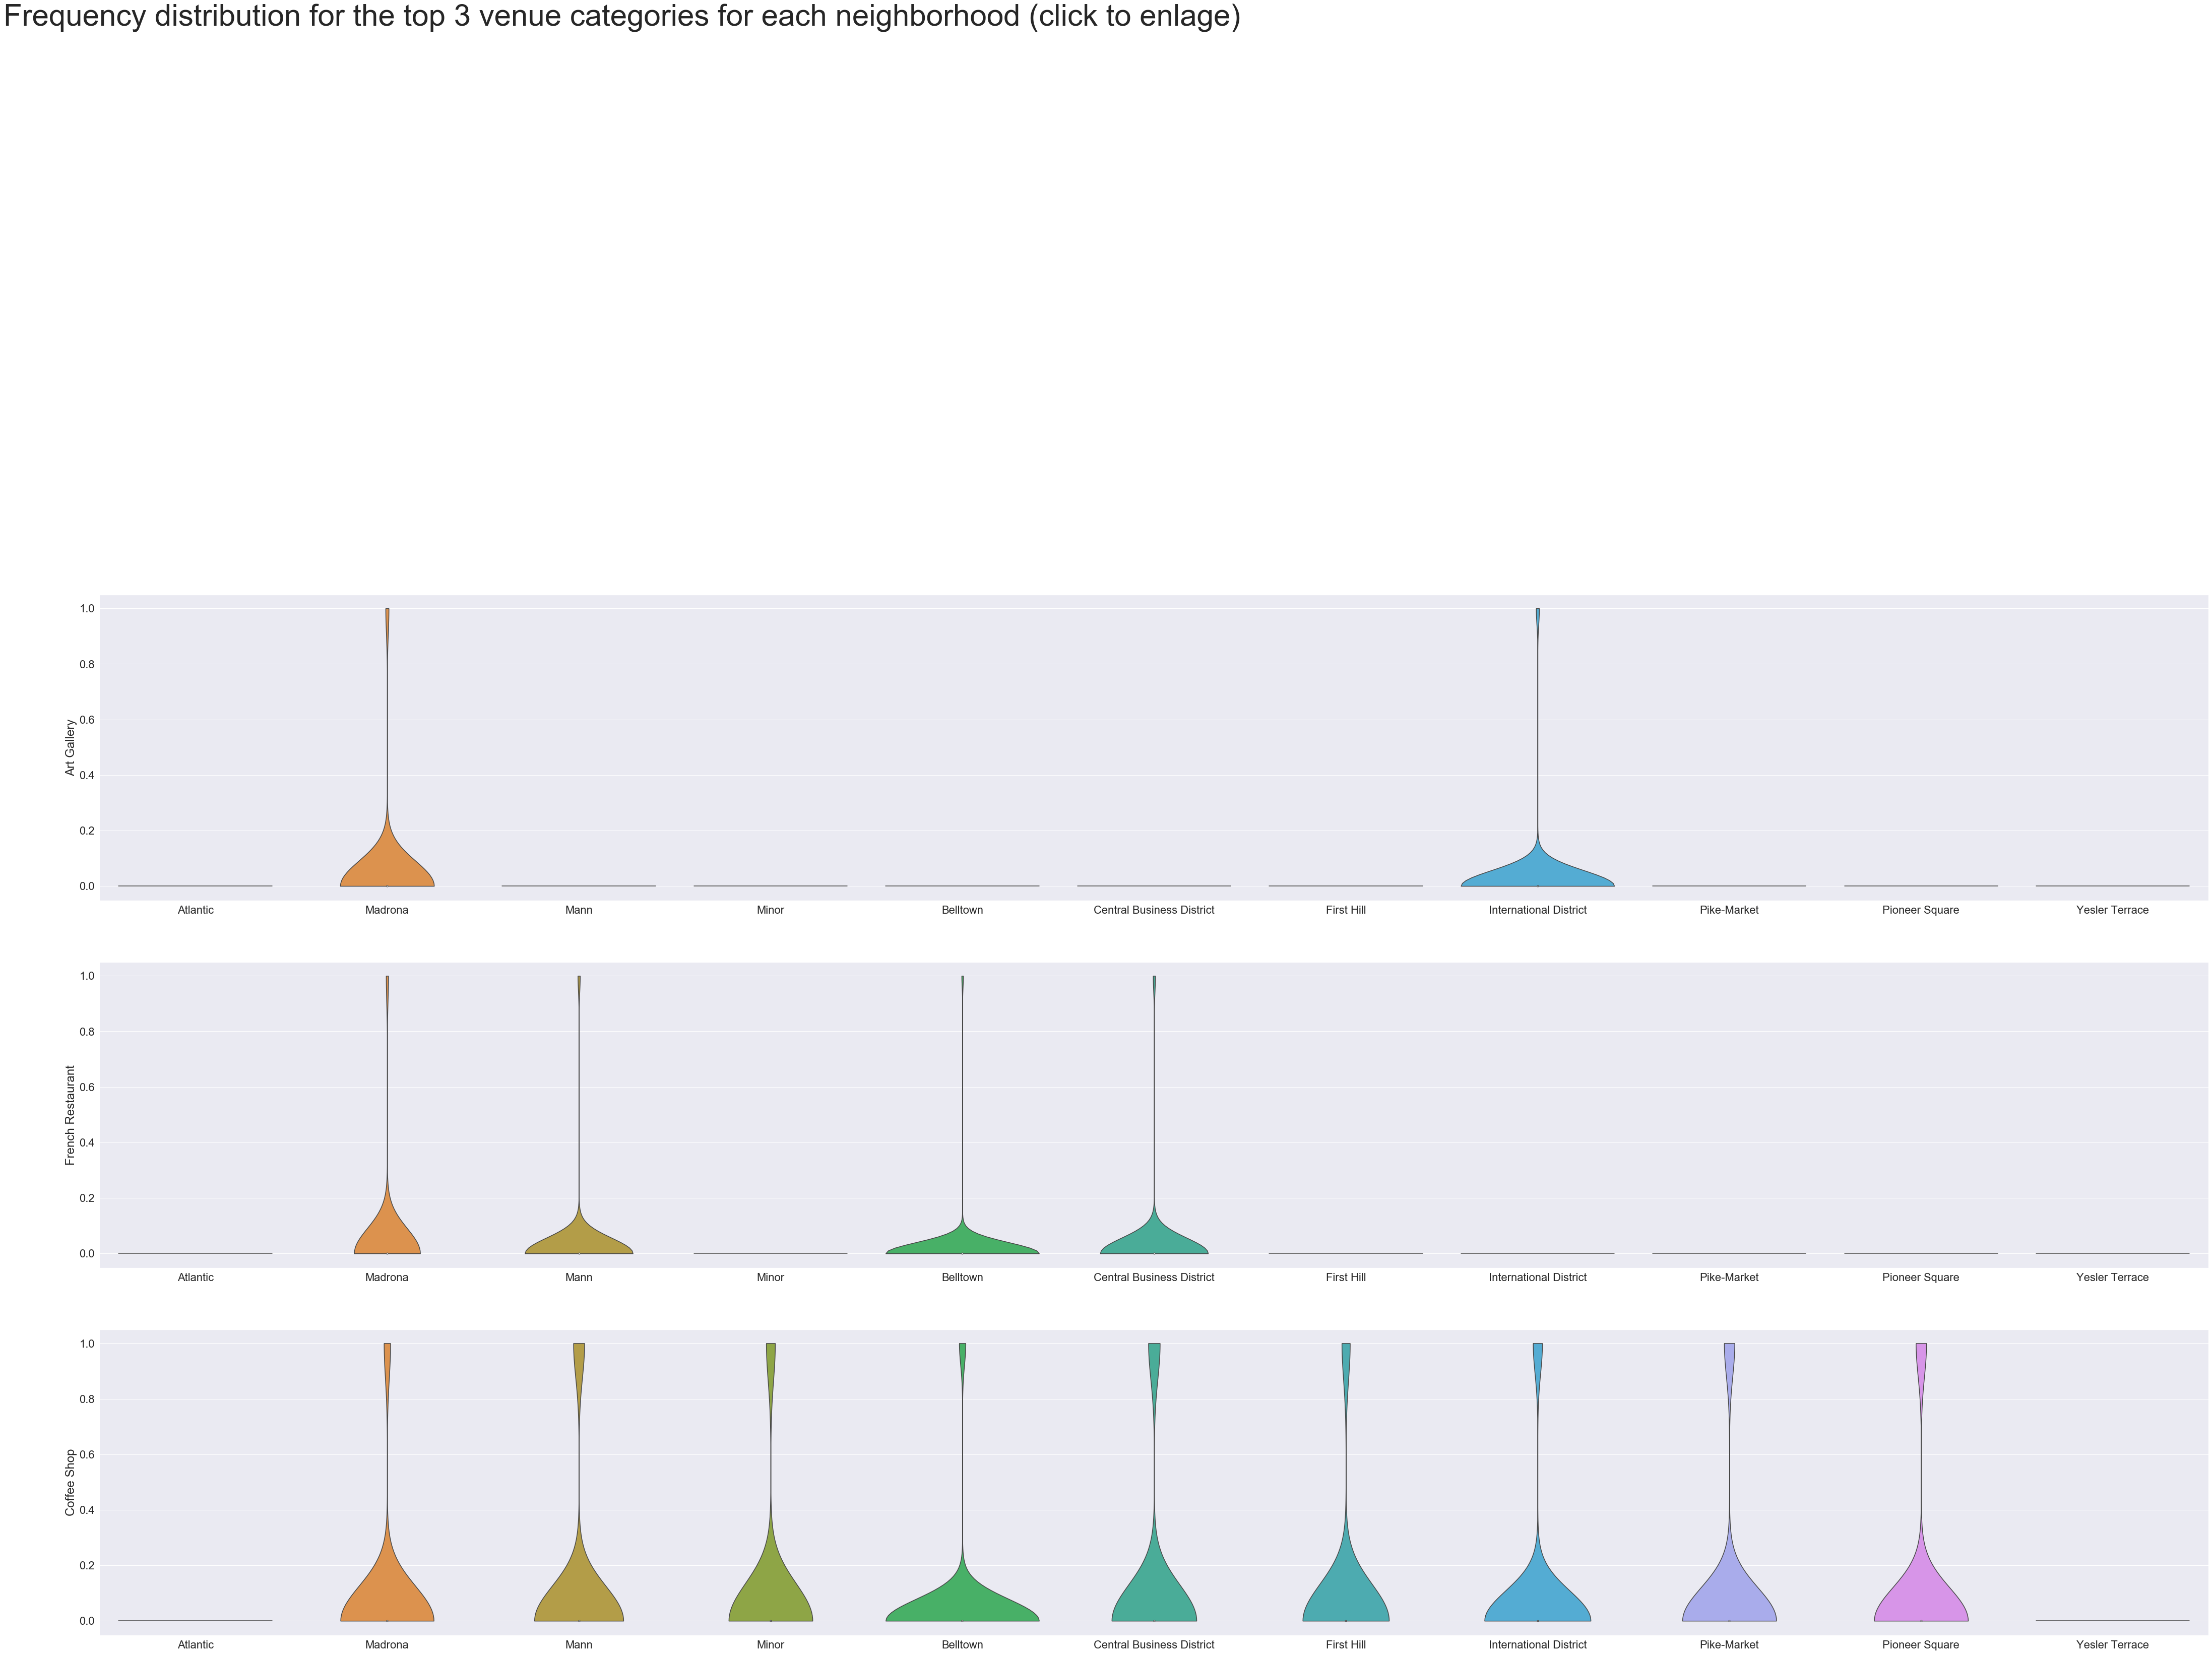

In [180]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(75,38))
sns.set(font_scale=2)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighbourhood", y="Art Gallery", data=Cluster_6New_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,2)
sns.violinplot(x="Neighbourhood", y="French Restaurant", data=Cluster_6New_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighbourhood", y="Coffee Shop", data=Cluster_6New_onehot, cut=0);
plt.xlabel("")

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_10_categories.png", dpi=240)
plt.show()

#Italian Restaurant
#Art Gallery
#Coffee shop


### 4. Results and Discussions 

As ca n be seen in the abobe table, there is one neighborhood --**Madrona** that has all the 3 best top venues. This means that Madrona meets the criteria for a new location for openning new Fashion boutiques according to the criteria that 3 specified venues are present in a great frequency (Art Galleries, French Restaurant, and coffee shop). 

Taking the analysis deeper, we can also see that the location is ideal as there is no single competition around the Madrona neighbourhood as shown in the plot below. 

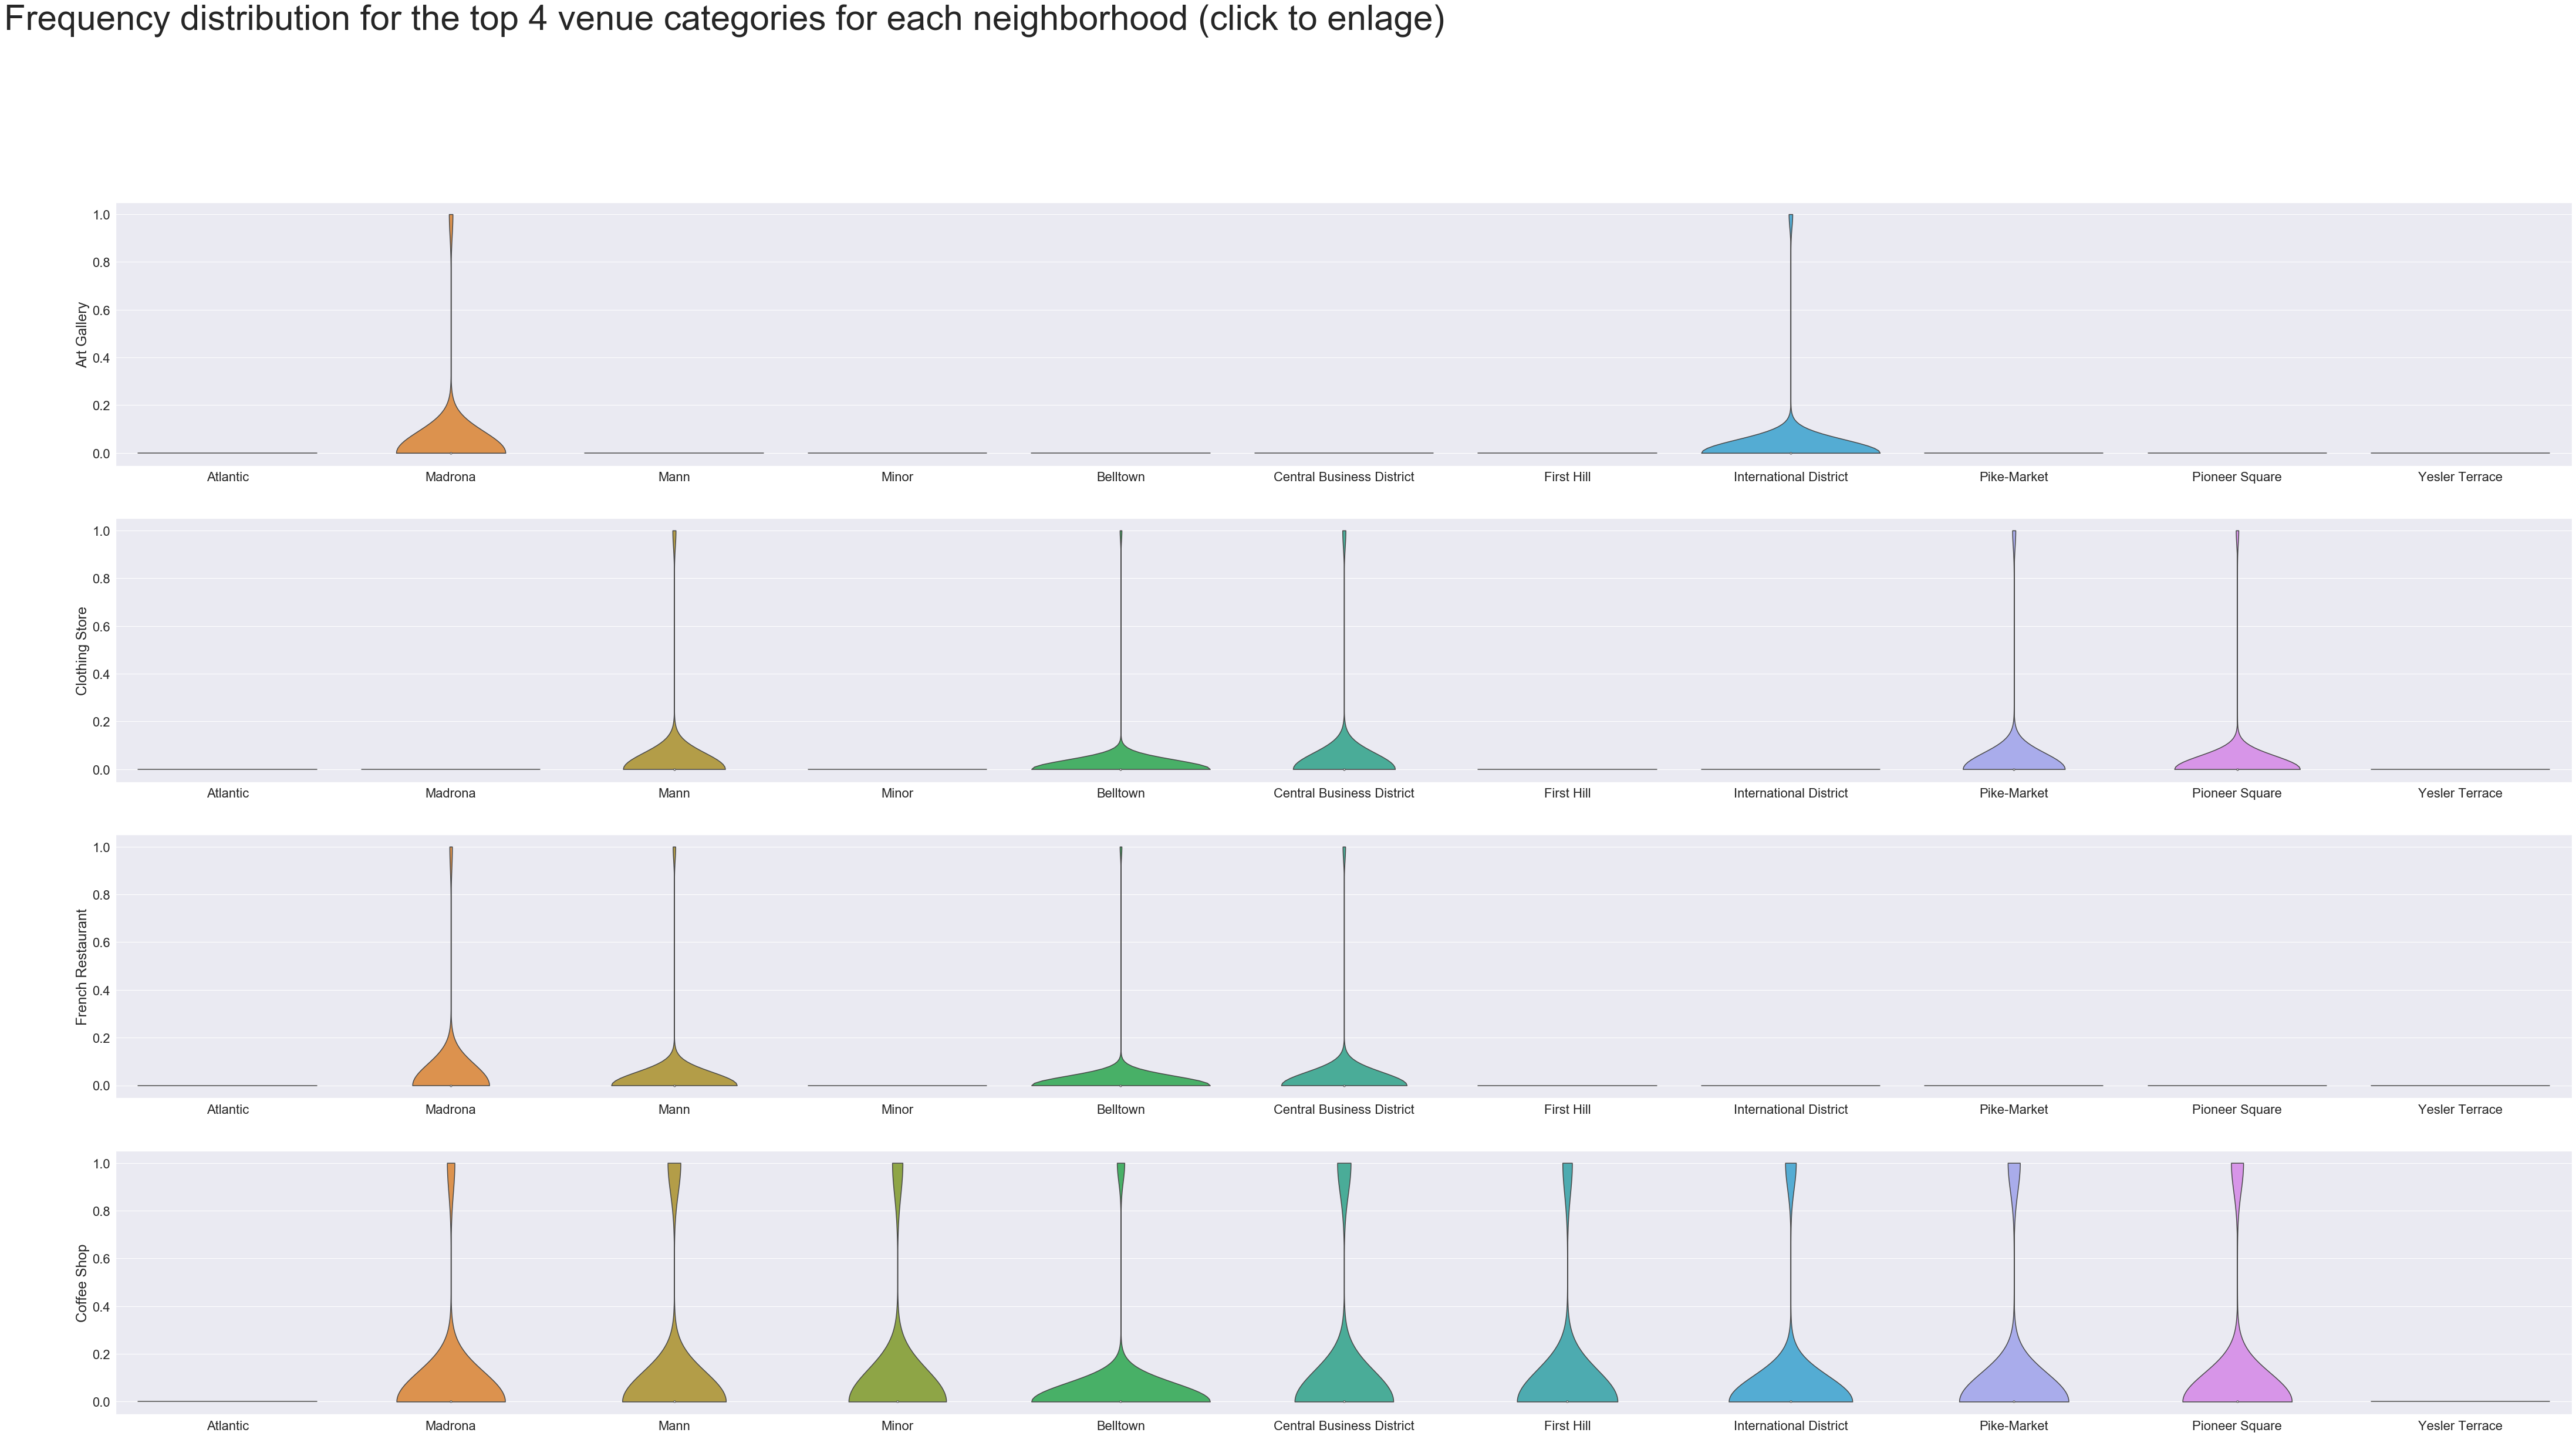

In [181]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 10 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(75,38))
sns.set(font_scale=2)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighbourhood", y="Art Gallery", data=Cluster_6New_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighbourhood", y="Clothing Store", data=Cluster_6New_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighbourhood", y="French Restaurant", data=Cluster_6New_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,4)
sns.violinplot(x="Neighbourhood", y="Coffee Shop", data=Cluster_6New_onehot, cut=0);
plt.xlabel("")

ax.text(-1.0, 3.1, 'Frequency distribution for the top 4 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_10_categories.png", dpi=240)
plt.show()


### Visualisation **Madrona on the seattle Map**

In [190]:
# create map of seattle using the above obtained geo cordinates. 
map_Cluster_6New = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(Cluster_6New['Latitude'], Cluster_6New['Longitude'], Cluster_6New['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= 5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_Cluster_6New)  
    
map_Cluster_6New

### 5. Conclusions:

In this work, inferences have been made in making new location recommendation and steered a course for Browns Fashion Boutique's Decision Makers to select the best possible location for their new store in **Seattle, WA**. This recommendation was based on the criteria of being in neighbourhoods that has at least an art gallery, a french restaurant and a coffee shop. This problem could be expanded by cnsidering more venues. 

To help arrive at this solution, K-means clustering was used to first group neighbourhoods from the entire seattle city and then select a cluster that met most of the criteria for details analysis. The visualisation library was also used to visualise the best location of the store. The final choice was then plotted using Foursquare location data. This process helped narrow down the scale of the analysis. Madrona neighbourhood was selected as the best location for the new store to be opened. 

### References 
1. https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Seattle
2. http://clerk.seattle.gov/~public/nmaps/neiglist.htm
3. http://data-seattlecitygis.opendata.arcgis.com/datasets/city-clerk-neighborhoods/data
4. http://insideairbnb.com/get-the-data.html
5. **.csv file**